In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [2]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data,mouse_data,on="Mouse ID",how="left")
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume_groupby = combined_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame({"Tumor Volume (mm3)": mean_tumor_volume_groupby})
mean_tumor_volume_df = mean_tumor_volume_df.reset_index()
# Preview DataFrame
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [127]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume_groupby = combined_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
sem_tumor_volume_df = pd.DataFrame({"Tumor Volume (mm3)": sem_tumor_volume_groupby})
sem_tumor_volume_df = sem_tumor_volume_df.reset_index()
# Preview DataFrame
sem_tumor_volume_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [128]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_df.head()
mean_tumor_volume_wide = mean_tumor_volume_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
sem_tumor_volume_wide = sem_tumor_volume_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
mean_tumor_volume_wide.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [129]:
# Capomulin, Infubinol, Ketapril, and Placebo
mean_tumor_volume_wide = mean_tumor_volume_wide[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
sem_tumor_volume_wide = sem_tumor_volume_wide[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

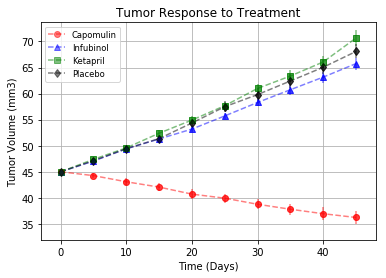

In [108]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
mean_tumor_volume_wide.plot(style=['--or', '--^b','--sg', '--dk'],alpha=0.5,ax=ax,legend=False)
ax.errorbar(mean_tumor_volume_wide.index.values, mean_tumor_volume_wide['Capomulin'], 
            yerr=sem_tumor_volume_wide['Capomulin'], fmt="o", color="r",
            alpha=0.5, label="Capomulin")
ax.errorbar(mean_tumor_volume_wide.index.values, mean_tumor_volume_wide['Infubinol'], 
            yerr=sem_tumor_volume_wide['Infubinol'], fmt="^", color="b",
            alpha=0.5, label="Infubinol")
ax.errorbar(mean_tumor_volume_wide.index.values, mean_tumor_volume_wide['Ketapril'], 
            yerr=sem_tumor_volume_wide['Ketapril'], fmt="s", color="g",
            alpha=0.5, label="Ketapril")
ax.errorbar(mean_tumor_volume_wide.index.values, mean_tumor_volume_wide['Placebo'], 
            yerr=sem_tumor_volume_wide['Placebo'], fmt="d", color="k",
            alpha=0.5, label="Placebo")

ax.set_xlim(-3, max(mean_tumor_volume_wide.index.values)+3)
ax.set_ylim(min(mean_tumor_volume_df["Tumor Volume (mm3)"]-3), 
            max(mean_tumor_volume_df["Tumor Volume (mm3)"]+3))
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.legend(labels=["Capomulin", "Infubinol", "Ketapril", "Placebo"], 
           loc="best", fontsize="small", fancybox=True)
plt.title("Tumor Response to Treatment")
plt.grid()
# Save the Figure
plt.savefig("./mean_tumor_volume_plot.png")
#plt.show()

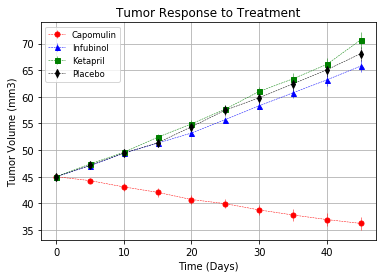

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [114]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site_groupby = combined_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
mean_met_site_df = pd.DataFrame({"Metastatic Sites": mean_met_site_groupby})
#mean_met_site_df = mean_met_site_df.reset_index()
# Preview DataFrame
mean_met_site_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [115]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_site_groupby = combined_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
sem_met_site_df = pd.DataFrame({"Metastatic Sites": sem_met_site_groupby})
#sem_met_site_df = sem_met_site_df.reset_index()
# Preview DataFrame
sem_met_site_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [116]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_site_df.head()
mean_met_site_df = mean_met_site_df.reset_index()
sem_met_site_df = sem_met_site_df.reset_index()
mean_met_site_wide = mean_met_site_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
sem_met_site_wide = sem_met_site_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
mean_met_site_wide.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [121]:
# Capomulin, Infubinol, Ketapril, and Placebo
mean_met_site_wide = mean_met_site_wide[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
sem_met_site_wide = sem_met_site_wide[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

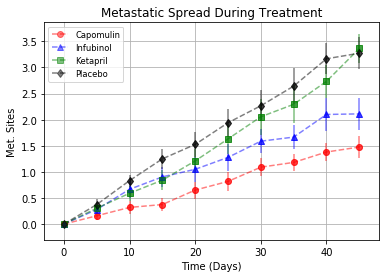

In [124]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
mean_met_site_wide.plot(style=['--or', '--^b','--sg', '--dk'],alpha=0.5,ax=ax,legend=False)
ax.errorbar(mean_met_site_wide.index.values, mean_met_site_wide['Capomulin'], 
            yerr=sem_met_site_wide['Capomulin'], fmt="o", color="r",
            alpha=0.5, label="Capomulin")
ax.errorbar(mean_met_site_wide.index.values, mean_met_site_wide['Infubinol'], 
            yerr=sem_met_site_wide['Infubinol'], fmt="^", color="b",
            alpha=0.5, label="Infubinol")
ax.errorbar(mean_met_site_wide.index.values, mean_met_site_wide['Ketapril'], 
            yerr=sem_met_site_wide['Ketapril'], fmt="s", color="g",
            alpha=0.5, label="Ketapril")
ax.errorbar(mean_met_site_wide.index.values, mean_met_site_wide['Placebo'], 
            yerr=sem_met_site_wide['Placebo'], fmt="d", color="k",
            alpha=0.5, label="Placebo")

ax.set_xlim(-3, max(mean_met_site_wide.index.values)+3)
ax.set_ylim(min(mean_met_site_df["Metastatic Sites"]-0.3), 
            max(mean_met_site_df["Metastatic Sites"]+0.5))
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Met. Sites")
plt.legend(labels=["Capomulin", "Infubinol", "Ketapril", "Placebo"], 
           loc="best", fontsize="small", fancybox=True)
plt.title("Metastatic Spread During Treatment")
plt.grid()
# Save the Figure
plt.savefig("./mean_met_site_plot.png")
#plt.show()


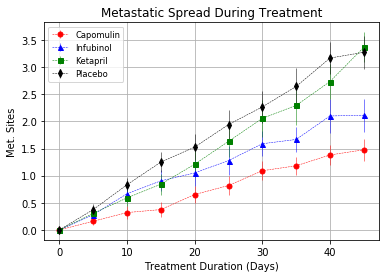

## Survival Rates

In [132]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mean_mice_groupby = combined_data.groupby(["Drug","Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
mean_mice_df = pd.DataFrame({"Mouse Count": mean_mice_groupby})
mean_mice_df = mean_mice_df.reset_index()
# Preview DataFrame
mean_mice_df.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [133]:
# Minor Data Munging to Re-Format the Data Frames
mean_mice_df = mean_mice_df.reset_index()
mean_mice_wide = mean_mice_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
# Preview that Reformatting worked
mean_mice_wide.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [155]:
# Capomulin, Infubinol, Ketapril, and Placebo
mean_mice_wide = mean_mice_wide[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
survival_rate = 100*mean_mice_wide/mean_mice_wide.iloc[0]
min(survival_rate)

'Capomulin'

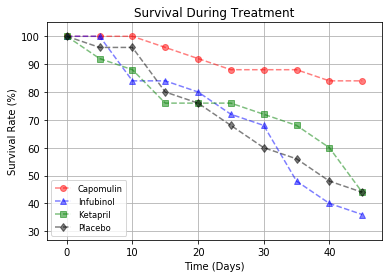

In [160]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()
survival_rate.plot(style=['--or', '--^b','--sg', '--dk'],alpha=0.5,ax=ax,legend=False)
ax.set_xlim(-3, max(survival_rate.index.values)+3)
ax.set_ylim(100*min(mean_mice_df["Mouse Count"])/max(mean_mice_df["Mouse Count"]), 105)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
plt.legend(labels=["Capomulin", "Infubinol", "Ketapril", "Placebo"], 
           loc="best", fontsize="small", fancybox=True)
plt.title("Survival During Treatment")
plt.grid()
# Save the Figure
plt.savefig("./mean_mice_plot.png")
#plt.show()

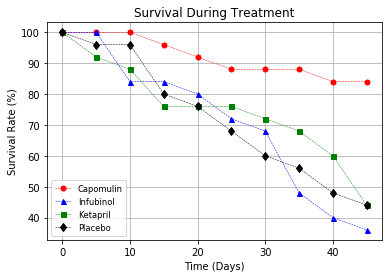

## Summary Bar Graph

In [182]:
# Creating a bar graph that compares the total % tumor volume change 
# for each drug across the full 45 days
# Calculate the percent changes for each drug
# Display the data to confirm
tumor_change = 100*(mean_tumor_volume_wide.iloc[9]-mean_tumor_volume_wide.iloc[0])/mean_tumor_volume_wide.iloc[0]
tumor_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

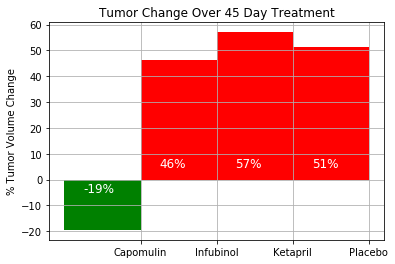

In [330]:
# Store all Relevant Percent Changes into a Tuple
tumor_change
# Splice the data between passing and failing drugs
passing = tumor_change[tumor_change<0]
failing = tumor_change[tumor_change>=0]
# Orient widths. Add labels, tick marks, etc.
fig, ax = plt.subplots()
bar_width = 1
four_drugs = ("Capomulin", "Infubinol", "Ketapril", "Placebo") 
#ax.bar(np.arange(0,4), tumor_change.values.tolist())
ax.bar(np.arange(0,1), passing.values.tolist(), width=bar_width, color="g")
ax.bar(np.arange(1,4), failing.values.tolist(), width=bar_width, color="r")
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_ylabel('% Tumor Volume Change')
ax.set_xticks(np.arange(0,4)+ bar_width/2)
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
ax.grid()
# Use functions to label the percentages of changes
x_pos = [0,1,2,3]
for i in range(len(four_drugs)):
    plt.text(x = x_pos[i]- bar_width/4, y = 5+(tumor_change[i]<0)*(-10), 
             s = str(int(tumor_change[i]))+"%", size = 12, color="w")
# Call functions to implement the function calls

# Save the Figure
#plt.savefig("./tumor_change_barchart.png")
# Show the Figure
fig.show()

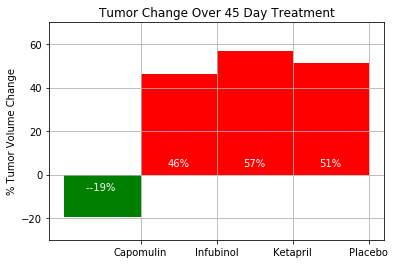